**<center style="font-size:300%">미니프로젝트2 - 드라마 데이터분석</center>**
<div style="text-align: right"> 프로젝트2 기간: 2022.04.01 ~ 2022.04.07 </div> 
<br> 
<br> 
<br>
<div style="text-align: right; font-size:180%"> 그날의 온도 </div>
<div style="text-align: right; font-size:120%"> 김태완, 백인엽, 유지현, 정시언, 정인모 </div>
<br>

##### **배경**
##### 콘텐츠는 끊임없이 최신 기술과 환경변화에 적응하면서 생태계를 확장해왔고, 최근 OTT, 신기술 등은 방송영상콘텐츠의 새로운 확장의 기회를 주고 있다.
##### 2020년 JTBC에서 방영돼 최고시청률 18.3% (닐슨코리아, 수도권 유료가구)를 기록한 '이태원 클라스'는 일본에서 리메이크가 확정됐다. 또한 최근 ‘밥 잘 사주는 예쁜 누나’ 또한 인도에서 리메이크를 확정지었다.
##### 방송가와 시청자들의 호평을 이끈 드라마들을 분석 및 예측하여 K-콘텐츠 성장에 기여하고자 한다.

##### **주제**
##### K-드라마 프로그램, 작가, 채널, 방영시간대, 시청률 등의 TV 콘텐츠 DB(출처: TNMS TV 컨텐츠 모니터링 데이터) 로 드라마 프로그램의 성연령별 선호도를 분석 및 예측

##### **결과** 
##### 학습결과 87.6%
-----------------------------------------------

## **모듈 import**

In [1]:
import numpy as np
import pandas as pd

import datetime

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost

from random import *

import pickle

## **데이터 준비**

#### 방송사, 시청률 데이터

In [2]:
df = pd.read_csv('TN_K_DRAMA_CST_AUDERT_INFO.csv', encoding='cp949')

#### 장르, 작가 데이터

In [3]:
df_gen = pd.read_csv('drama_genre_200.csv', encoding='cp949')

## **데이터 전처리**

#### 장르와 작가 데이터를 기존 데이터 프레임에 추가

In [4]:
genre = []
writer = []
for i in df.PROGRM_NM:
    genre.append(df_gen.loc[df_gen.제목 == i].iloc[:,2].values[0])
    writer.append(df_gen.loc[df_gen.제목 == i].iloc[:,1].values[0])

df["GENRE"] = genre
df["WRITER"] = writer

In [20]:
len(genre)

75932

57    로맨틱코미디
Name: 장르, dtype: object
57    로맨틱코미디
Name: 장르, dtype: object
431    로맨틱코미디
Name: 장르, dtype: object
431    로맨틱코미디
Name: 장르, dtype: object
431    로맨틱코미디
Name: 장르, dtype: object
431    로맨틱코미디
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
252    스릴러
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
414    로맨틱코미디
Name: 장르, dtype: object
334    막장
Name: 장르, dtype: object
156    범죄
Name: 장르, dtype: object
156    범죄
Name: 장르, dtype: object
334    막장
Name: 장르, dtype: object
277    멜로
Name: 장르, dtype: object
345    시대극
Name: 장르, dtype: object
277    멜로
Name: 장르, dtype: object
277    멜로
Name: 장르, dtype: object
218    의학
Name: 장르, dtype: object
218    의학
Name: 장르, dtype: ob

KeyboardInterrupt: 

## **새 데이터 입력**

In [30]:
PN = input('''드라마 제목을 입력하십시오
''')
BRD = int(input('''방영날짜를 입력하십시오
ex) 20220406
'''))
CNM = input(f'''방송사를 입력하십시오 
방송사 목록 : {list(df['CHNNEL_NM'].unique())}
''')
GEN = input(f'''장르를 입력하십시오
장르 목록 : {list(df['GENRE'].unique())}
''')
WRI = input(f'''작가를 입력하십시오
''')
PBT = int(input(f'''방영시작 시간을 입력하십시오
ex) 201530 = 20시 15분 30초
'''))
PET = int(input(f'''방영종료 시간을 입력하십시오
ex) 213000 = 21시 30분 00초
'''))


BDT_B = int(str(PBT)[0:2]) * 3600 + int(str(PBT)[2:4]) * 60 + int(str(PBT)[4:6])
BDT_E = int(str(PET)[0:2]) * 3600 + int(str(PET)[2:4]) * 60 + int(str(PET)[4:6])
BDT_F = BDT_E - BDT_B
ho = BDT_F//3600
mi = (BDT_F%3600)//60
sec = (BDT_F%3600)%60
BDT = str(ho) + str(mi) + str(sec)

new_drama = {'PROGRM_NM':f'{PN}',
             'BRDCST_DE':f'{BRD}',
             'CHNNEL_NM':f'{CNM}',
             'GENRE':f'{GEN}',
             'WRITER':f'{WRI}',
             'PROGRM_BEGIN_TIME':f'{PBT}',
             'PROGRM_END_TIME':f'{PET}',
             'BRDCST_TIME':f'{BDT}'}

df = df.append(new_drama, ignore_index=True)

df.loc[len(df)-1, ["MALE_4_9YO_WTCHNG_RT", "MALE_N10S_WTCHNG_RT", "MALE_N20S_WTCHNG_RT", "MALE_N30S_WTCHNG_RT",
             "MALE_N40S_WTCHNG_RT", "MALE_N50S_WTCHNG_RT", "MALE_N60S_ABOVE_WTCHNG_RT",
             "FEMALE_4_9YO_WTCHNG_RT", "FEMALE_N10S_WTCHNG_RT", "FEMALE_N20S_WTCHNG_RT", "FEMALE_N30S_WTCHNG_RT",
             "FEMALE_N40S_WTCHNG_RT", "FEMALE_N50S_WTCHNG_RT", "FEMALE_N60S_ABOVE_WTCHNG_RT"]] = 0

드라마 제목을 입력하십시오
 그날의온도
방영날짜를 입력하십시오
ex) 20220406
 20210410
방송사를 입력하십시오 
방송사 목록 : ['KBS2', 'MBC', 'SBS', 'JTBC', 'tvN', '국방TV', 'OCN Movies', 'AXN', 'CHING', 'CNTV', 'DRAMAcube', 'DramaH', 'Dramax', 'E채널', 'FOX채널', 'JTBC2', 'KBS DRAMA', 'KBS W', 'K-STAR', 'KTV', 'O tvN', 'OCN', 'SBS플러스', 'SKY', 'ONCE', 'SKYUHD', 'OCN Thrills', 'TRENDY', 'XtvN', 'KBS1', 'MBC M', "O'live", 'On Style', 'WeLike', 'MBC every1', 'OBS', '채널A', 'NQQ', 'TV CHOSUN', 'FX', '가톨릭평화방송', 'KBS JOY', 'MBN', '채널MX', 'TV CHOSUN2', 'KBS Story', 'JNG KOREA', 'SBS funE', '채널나우', 'AsiaUHD']
 KBS1
장르를 입력하십시오
장르 목록 : ['로맨틱코미디', '스릴러', '막장', '범죄', '멜로', '시대극', '의학', '가족', '로맨스', '사극', '청춘성장', '미스터리', '법정', '블랙코미디', '판타지', '퓨전사극', '로맨틱판타지', '코미디', '액션', '스포츠', '정치', '종교', '밀리터리']
 스릴러
작가를 입력하십시오
 김순옥
방영시작 시간을 입력하십시오
ex) 201530 = 20시 15분 30초
 221000
방영종료 시간을 입력하십시오
ex) 213000 = 21시 30분 00초
 233000


#### 기존 방송날짜 컬럼을 제거하고 년도, 월, 요일 데이터를 잘라 각 컬럼으로 추가

In [5]:
year = []
month = []
day = []

for i in df['BRDCST_DE'].values:
    year.append(int(str(i)[0:4]))
    month.append(int(str(i)[4:6]))
    day.append(int(str(i)[6:8]))

WD = []
wd = ['월','화','수','목','금','토','일']
for i in range(0, len(df)):
    D = str(df.loc[i, 'BRDCST_DE'])
    y = int(D[0:4])
    if D[4:5] == '0':
        m = int(D[5:6])
    else:
        m = int(D[4:6])
    if D[6:7] == '0':
        d = int(D[7:8])
    else:
        d = int(D[6:8])
    WD.append(wd[datetime.date(y,m,d).weekday()])

df.drop("BRDCST_DE", axis=1, inplace=True)

df["BRDCST_DE_YEAR"] = year
df["BRDCST_DE_MONTH"] = month
df["BRDCST_DE_DAY"] = WD

#### 방송시작 시간 컬럼을 시간으로 분리

In [6]:
hr = []
li = []
for i in df.PROGRM_BEGIN_TIME:
    li.append("0"*(6-len(str(i))) + str(i))
    
for i in li:
    hr.append(int(i[0:2]))

df["PROGRM_BEGIN_TIME_HOUR"] = hr

#### 방송종료 시간 컬럼을 시간으로 분리

In [7]:
hr = []
li = []
for i in df.PROGRM_END_TIME:
    li.append("0"*(6-len(str(i))) + str(i))

for i in li:
    hr.append(int(i[0:2]))

df["PROGRM_END_TIME_HOUR"] = hr

#### 방송시간을 분단위로 계산하여 컬럼 생성

In [8]:
mit = []
li = []
for i in df.BRDCST_TIME:
    li.append("0"*(6-len(str(i))) + str(i))

for i in li:
    mit.append(int(i[0:2])*60 + int(i[2:4]))

df["BRDCST_TIME_MIN"] = mit

#### 데이터 분석에 필요없는 컬럼 삭제

In [9]:
df.drop(["PROGRM_BEGIN_TIME", "PROGRM_END_TIME", "PROGRM_DC", "BRDCST_TME_NM", "PROGRM_BRDCST_AREA_NM",
        "BRDCST_TIME", "PROGRM_GENRE_LCLAS_NM", "PROGRM_GENRE_MLSFC_NM", "PROGRM_GENRE_SCLAS_NM", "CST_CN", "PROGRM_NM"], axis=1, inplace=True)

#### 데이터 컬럼 순서 정렬

In [10]:
df = df[["CHNNEL_NM", "GENRE", "WRITER", "BRDCST_DE_YEAR", "BRDCST_DE_MONTH", "BRDCST_DE_DAY", "PROGRM_BEGIN_TIME_HOUR",
         "PROGRM_END_TIME_HOUR", "BRDCST_TIME_MIN",
         "MALE_4_9YO_WTCHNG_RT", "MALE_N10S_WTCHNG_RT", "MALE_N20S_WTCHNG_RT", "MALE_N30S_WTCHNG_RT",
         "MALE_N40S_WTCHNG_RT", "MALE_N50S_WTCHNG_RT", "MALE_N60S_ABOVE_WTCHNG_RT",
         "FEMALE_4_9YO_WTCHNG_RT", "FEMALE_N10S_WTCHNG_RT", "FEMALE_N20S_WTCHNG_RT", "FEMALE_N30S_WTCHNG_RT",
         "FEMALE_N40S_WTCHNG_RT", "FEMALE_N50S_WTCHNG_RT", "FEMALE_N60S_ABOVE_WTCHNG_RT"]]

In [37]:
df.head()

,CHNNEL_NM,GENRE,WRITER,BRDCST_DE_YEAR,BRDCST_DE_MONTH,BRDCST_DE_DAY,PROGRM_BEGIN_TIME_HOUR,PROGRM_END_TIME_HOUR,BRDCST_TIME_MIN,MALE_4_9YO_WTCHNG_RT,...,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
0,KBS2,로맨틱코미디,이은영,2020,8,토,14,15,59,0.00000,...,0.91639,0.27966,0.94113,0.16798,0.28583,0.78013,0.56980,0.91242,1.27294,1.08752
1,KBS2,로맨틱코미디,이은영,2020,8,토,15,16,59,1.33612,...,1.09392,1.09094,0.85427,2.71430,0.35422,0.76373,0.63946,1.33327,1.06163,1.05816
2,KBS2,로맨틱코미디,양희승,2020,8,토,16,17,35,1.12351,...,0.93119,1.84768,1.59782,2.41201,0.22563,0.71379,0.32090,1.42744,1.80667,2.23325
3,KBS2,로맨틱코미디,양희승,2020,8,토,17,18,34,0.54216,...,0.59891,3.03496,2.40529,1.29431,0.89403,1.58100,0.61488,2.05049,3.01190,4.06106
4,KBS2,로맨틱코미디,양희승,2020,8,토,20,20,35,4.49873,...,8.35386,15.80473,23.23686,8.50071,4.71792,6.00506,9.07805,10.97205,21.75954,25.94442


# **데이터 분석(sklearn 사용)**

#### 범주형 데이터에 한해 원핫인코더 적용

In [11]:
ct = make_column_transformer(
    (OneHotEncoder(), ["CHNNEL_NM", "GENRE", "WRITER", "BRDCST_DE_DAY"])
)

newCols = ct.fit_transform(df).toarray()
df.drop(["CHNNEL_NM", "GENRE", "WRITER", "BRDCST_DE_DAY"], axis = 1, inplace = True)
df = pd.concat([pd.DataFrame(newCols),df], axis = 1)

#### 시청률 데이터를 간소화, 범주화
##### 35% 이상 = 10
##### 23% 이상 = 9
##### 15% 이상 = 8
##### 10% 이상 = 7
##### 5% 이상 = 6
##### 3% 이상 = 5
##### 1% 이상 = 4
##### 0.5% 이상 = 3
##### 0.1% 이상 = 2
##### 0.01% 이상 = 1
##### 0.01% 이하 = 0

In [12]:
dic = {}
dic2 = {}
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:
        li = []
        for i in df[f"{s}_{age}_WTCHNG_RT"]:
            if(i >= 35):
                li.append(10)
            elif(i >= 23):
                li.append(9)
            elif(i >= 15):
                li.append(8)
            elif(i >= 10):
                li.append(7)
            elif(i >= 5):
                li.append(6)
            elif(i >= 3):
                li.append(5)
            elif(i >= 1):
                li.append(4)
            elif(i >= 0.5):
                li.append(3)
            elif(i >= 0.1):
                li.append(2)
            elif(i >= 0.01):
                li.append(1)
            else:
                li.append(0)
        dic2[age] = li
    dic[s] = dic2
    
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:
        df.drop(f"{s}_{age}_WTCHNG_RT", axis = 1)
for s in ["MALE", "FEMALE"]:
    for age in ["4_9YO", "N10S", "N20S", "N30S", "N40S", "N50S", "N60S_ABOVE"]:        
        df[f"{s}_{age}_WTCHNG_RT"] = dic[s][age]

#### 최종 데이터프레임

In [40]:
print(75933*395)
df

29993535


,0,1,2,3,4,5,6,7,8,9,...,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,4,4,2,2,3,3,3,4,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,2,3,3,4,4,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,4,4,4,2,3,2,4,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4,5,5,4,3,4,3,4,5,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7,8,9,6,5,6,6,7,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,2,0,0,2,1,0,1
75929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,1,0,1,1,1,1,2,1
75930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2,2,3,0,1,1,2,2,2
75931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2,2,0,0,1,0,1,2,2


## **모델학습**

In [13]:
X = df.iloc[:, :-14]
y = df.iloc[:,-14:]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

rf_model = RandomForestClassifier() 
rf_model.fit(X_train,y_train)
rf_result = rf_model.predict_proba(X_test)
rf_pred = rf_model.predict(X_test)

In [15]:
f = open('drama_model.pickle', 'wb')
pickle.dump(rf_model, f)

In [19]:
f = open('../2_project/drama_model.pickle', 'rb')
model = pickle.load(f)
model.predict(X_test)

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 2, ..., 2, 2, 3],
       [0, 0, 0, ..., 0, 1, 2],
       ...,
       [0, 0, 0, ..., 0, 2, 2],
       [0, 1, 1, ..., 2, 2, 1],
       [0, 0, 1, ..., 1, 1, 1]], dtype=int64)

In [63]:
RE_list = []
PR = df.iloc[len(df)-1, :-14]
RESULT = rf_model.predict([PR])

for i in RESULT[0]:
    if i == 0:
        i = randint(1, 10)/1000
    elif i == 1:
        i = randint(1, 10)/100
    elif i == 2:
        i = randint(1, 5)/10
    elif i == 3:
        i = randint(50, 100)/100
    elif i == 4:
        i = randint(100, 300)/100
    elif i == 5:
        i = randint(300, 500)/100
    elif i == 6:
        i = randint(500, 1000)/100
    elif i >= 7:
        i = randint(100, 150)/10
    elif i >= 8:
        i = randint(150, 230)/10
    elif i >= 9:
        i = randint(230, 350)/10
    elif i >= 10:
        i = randint(350, 500)/10
    RE_list.append(i)

    
    
    
print(f'''
4세 ~ 9세 남성의 평균 시청률: {RE_list[0]}%
10대 남성의 평균 시청률: {RE_list[1]}%
20대 남성의 평균 시청률: {RE_list[2]}%
30대 남성의 평균 시청률: {RE_list[3]}%
40대 남성의 평균 시청률: {RE_list[4]}%
50대 남성의 평균 시청률: {RE_list[5]}%
60대 이상 남성의 평균 시청률: {RE_list[6]}%
남성 평균 시청률: {round((sum(RE_list[0:7])/7),2)}%

4세 ~ 9세 여성의 평균 시청률: {RE_list[7]}%
10대 여성의 평균 시청률: {RE_list[8]}%
20대 여성의 평균 시청률: {RE_list[9]}%
30대 여성의 평균 시청률: {RE_list[10]}%
40대 여성의 평균 시청률: {RE_list[11]}%
50대 여성의 평균 시청률: {RE_list[12]}%
60대 이상 여성의 평균 시청률: {RE_list[13]}%
여성 평균 시청률: {round((sum(RE_list[7:14])/7),2)}%

총합산 예측 평균 시청률: {(round((sum(RE_list[0:7])/7),2)+ round((sum(RE_list[7:14])/7),2))/2}%
''')


4세 ~ 9세 남성의 평균 시청률: 0.001%
10대 남성의 평균 시청률: 0.002%
20대 남성의 평균 시청률: 0.007%
30대 남성의 평균 시청률: 7.53%
40대 남성의 평균 시청률: 6.14%
50대 남성의 평균 시청률: 13.6%
60대 이상 남성의 평균 시청률: 10.8%
남성 평균 시청률: 5.44%

4세 ~ 9세 여성의 평균 시청률: 0.01%
10대 여성의 평균 시청률: 0.002%
20대 여성의 평균 시청률: 0.007%
30대 여성의 평균 시청률: 8.11%
40대 여성의 평균 시청률: 6.08%
50대 여성의 평균 시청률: 13.9%
60대 이상 여성의 평균 시청률: 14.3%
여성 평균 시청률: 6.06%

총합산 예측 평균 시청률: 5.75%



#### 4세 이상 9세 이하 남자아이에 한하여 예측 데이터 정확도

#### 예측값에 가장 많은 영향을 미친 컬럼 시각화

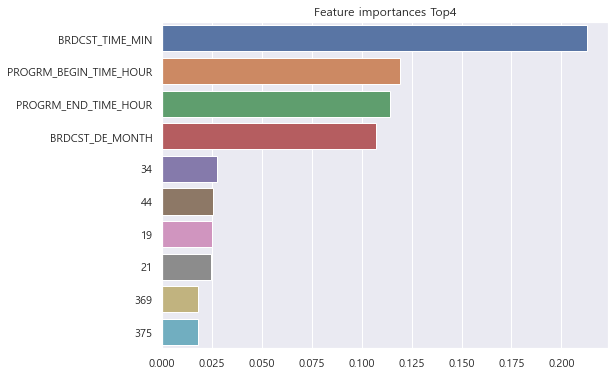

In [30]:
ftr_importances_values = rf_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top4')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

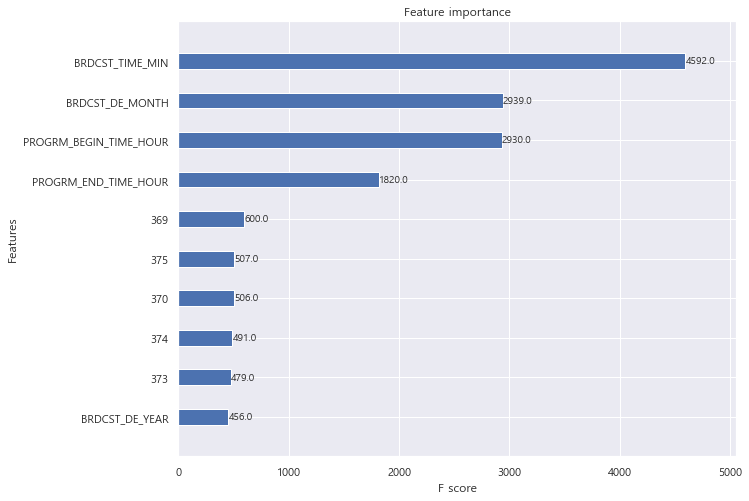

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_model, ax=ax, max_num_features=10, height=0.4)

##  **데이터 분석**

#### 데이터 시각화

##### 시간대, 성별나이의 시청률 그래프

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='darkgrid')

fig, ax = plt.subplots(nrows =4, ncols = 3, figsize = (25,20))

num = 0
ax = ax.flatten()

for col in list(df.columns[11:25]):
    sns.barplot(x=df['PROGRM_BEGIN_TIME_HOUR'],y=df[col],ax=ax[num])
    num += 1
    
plt.show()

##### 요일별 시청률 그래프

<AxesSubplot:xlabel='FEMALE_N10S_WTCHNG_RT', ylabel='BRDCST_DE_DAY'>

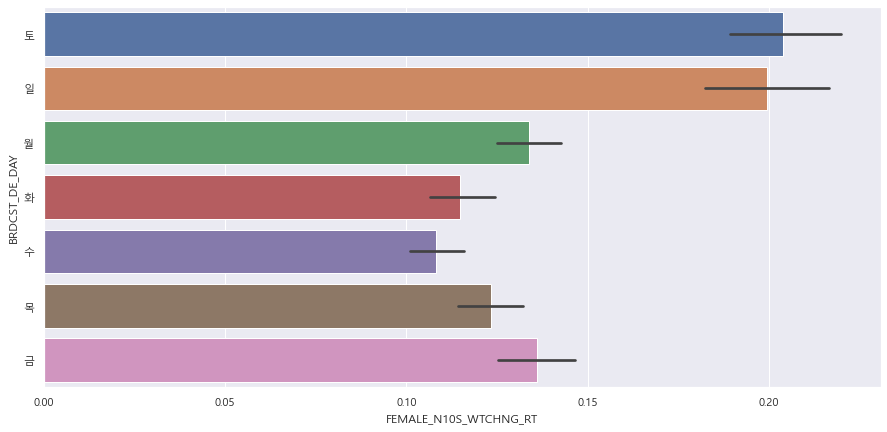

In [27]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['FEMALE_N10S_WTCHNG_RT'],y=df['BRDCST_DE_DAY'],data=df)

##### 10대 여성 채널별 시청률 그래프

채널 수 : 50


<AxesSubplot:xlabel='FEMALE_N10S_WTCHNG_RT', ylabel='CHNNEL_NM'>

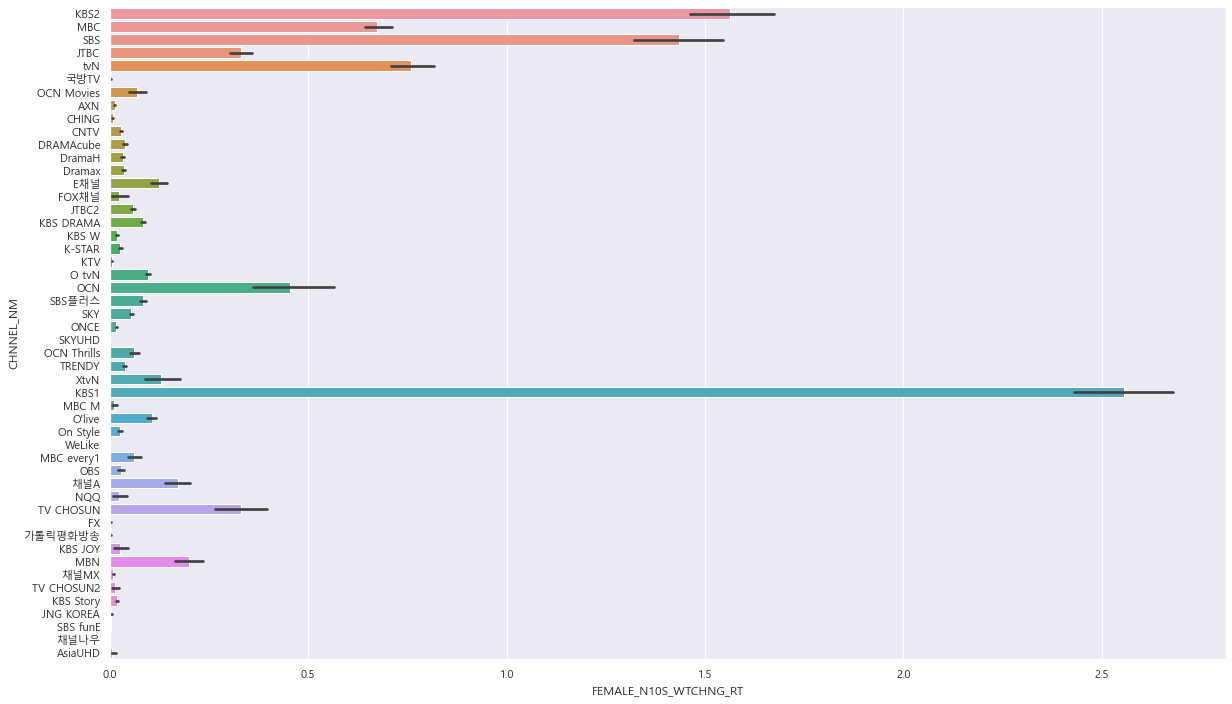

In [37]:
print(f'''채널 수 : {len(df['CHNNEL_NM'].unique())}''')

plt.figure(figsize=(20,12))
sns.barplot(x=df['FEMALE_N10S_WTCHNG_RT'],y=df['CHNNEL_NM'],data=df)

##### 30대 여성 장르별 시청률 그래프

<AxesSubplot:xlabel='MALE_N30S_WTCHNG_RT', ylabel='GENRE'>

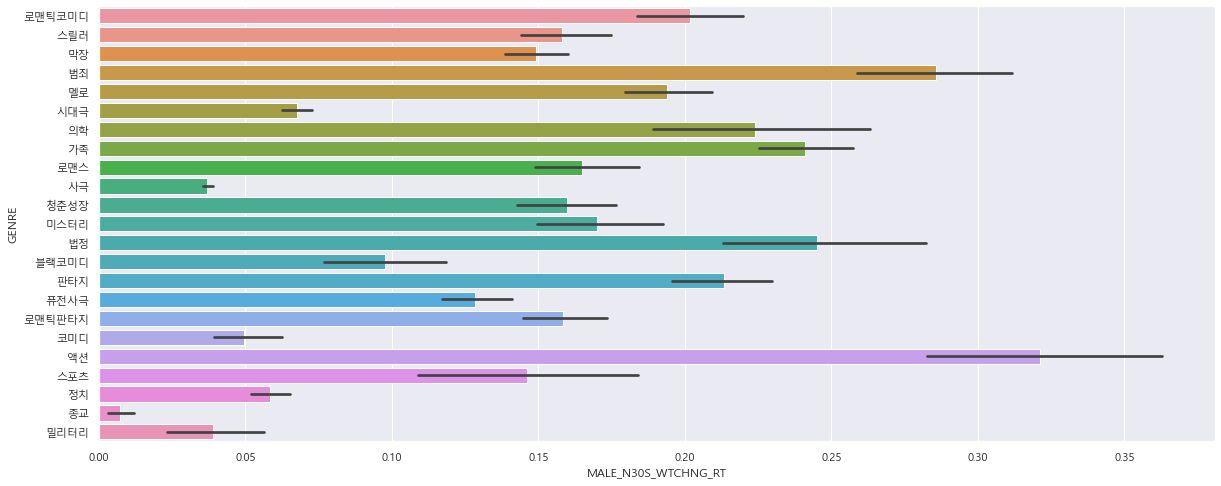

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['MALE_N30S_WTCHNG_RT'],y=df['GENRE'],data=df)